In [167]:
%matplotlib inline
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import seaborn as sns
import plotly.graph_objects as go
from typing import Dict, Any, Optional
import plotly.express as px
import ast

_RESNET18_BENCHMARK=0.9545
_WIDE_RESNET_BENCHMARK=0.95
_IMAGENET_BENCHMARK=0.7674
_BEST_MIN_SAL_THRES=0.3
_GROUPBY_VARS = [
    "rigl.const_fan_in",
    "rigl.dense_allocation",
    "rigl.dynamic_ablation",
    "rigl.min_salient_weights_per_neuron",
]
_SUMMARY_COLS = [
    "name",
    "sweep_id",
    "tags",
    "best_accuracy",
    "rigl.const_fan_in",
    "rigl.dense_allocation",
    "rigl.dynamic_ablation",
    "rigl.min_salient_weights_per_neuron",
    "epoch"
]
plt.style.use("../plt_plot_style.mplstyle")

In [100]:
def fill_na_cols(df):
    df["rigl.min_salient_weights_per_neuron"] = df["rigl.min_salient_weights_per_neuron"].fillna(0)
    df["rigl.dynamic_ablation"] = df["rigl.dynamic_ablation"].fillna(False)
    df.loc[df["model.name"].isna(), "model.name"] = df["model"]
    df.loc[df["model"].isna(), "model"] = df["model.name"]
    return df
df = pd.read_csv("../processed_results.csv", index_col="id")
df = fill_na_cols(df)
df.head()

/tmp/ipykernel_2036987/527118440.py:7: DtypeWarning: Columns (14,15,16,19,20,21,22,23,26,27,28,29,31,33,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
sgobcbk8,0.659508,0.8,3.165721,0,0.291265,26310.0,95.464441,90461.0,26250.0,1.674147e+09,...,"[202, 4, 7, 13, 29, 67, 82, 133, 138, 136, 134...",0.000643,0.0,histogram,"[0, 0.008674089796841145, 0.01734817959368229,...","[208, 0, 0, 0, 0, 0, 6, 6, 12, 17, 28, 31, 60,...",histogram,"[-0.24319034814834595, -0.23071640729904175, -...","[1, 2, 1, 0, 1, 6, 10, 27, 60, 140, 329, 827, ...",1840.0
15bpduz9,0.827545,0.8,2.980471,1,0.289028,27060.0,98.185776,90719.0,29400.0,1.674147e+09,...,"[35, 0, 0, 2, 4, 9, 27, 49, 115, 135, 159, 180...",0.000781,0.0,histogram,"[0, 0.010491162538528442, 0.020982325077056885...","[40, 0, 0, 0, 0, 5, 6, 17, 40, 66, 122, 170, 2...",histogram,"[-0.1750904768705368, -0.1618635207414627, -0....","[3, 5, 11, 39, 107, 323, 1100, 3423, 8888, 171...",2009.0
23z6fstx,0.502338,0.8,3.084749,2,0.289028,24470.0,88.788099,90640.0,29576.0,1.674147e+09,...,"[555, 11, 16, 22, 37, 40, 46, 57, 76, 83, 84, ...",0.002104,0.0,histogram,"[0, 0.01036905124783516, 0.02073810249567032, ...","[566, 0, 0, 1, 1, 3, 5, 8, 16, 19, 19, 32, 41,...",histogram,"[-0.21995513141155243, -0.20614928007125854, -...","[3, 9, 8, 24, 63, 121, 257, 523, 1002, 1567, 2...",1483.0
3sdyxl32,0.176642,0.8,3.865192,3,0.289028,21454.0,77.844702,90686.0,29576.0,1.674147e+09,...,"[1008, 43, 60, 45, 45, 40, 37, 26, 33, 32, 33,...",0.002101,0.0,histogram,"[0, 0.011912554502487183, 0.023825109004974365...","[971, 0, 1, 11, 14, 14, 14, 13, 22, 18, 30, 30...",histogram,"[-0.48604869842529297, -0.4665416479110718, -0...","[1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 4, 6, 8, 11, 32...",1077.0
3ct6gk0n,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# from itertools import product

# param_sweep = {"rigl.dense_allocation": [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#                "rigl.min_salient_weights_per_neuron":[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
#                "training.seed":[8746, 6037, 7303, 2078, 42],
#                "model": ["resnet18", "wide_resnet22"], 
#                "sweep_id": ["1fik36lx"]
# }


# def get_missing_params(param_sweep, df):
#     keys = param_sweep.keys()
#     vals = param_sweep.values()
#     missing_params = []
#     for instance in product(*vals):
#         missing_params.append({k: v for k,v in list(zip(keys, instance))})
#     return missing_params
        

# # df.loc[df["sweep_id"]=="1fik36lx"]
# # vars=["rigl.dense_allocation", "rigl.min_salient_weights_per_neuron", "training.seed", "model"]
# # df_slice = df.loc[df["sweep_id"]=="1fik36lx"]
# # df_slice.groupby(vars).count()["best_accuracy"]
    
# missing_params = get_missing_params(param_sweep, df)
# # print([df[k]==v for k,v in missing_params[0].items()])


# def get_df_slice(params, df):
#     missing_params = []
#     for instance in params:
#         df_slice = df.copy()
#         for k,v in instance.items():
#             df_slice = df_slice.loc[df[k]==v]
#         if len(df_slice) == 0:
#             # print(instance)
#             missing_params.append(instance)
#     return missing_params


# df_slice = get_df_slice(missing_params, df)
# df_slice
# # for params in product(dense_alloc.values(), min_sal.values(), seed.values(), model.values()):
# #     print(params)
# #     print(type(params))
    
# # # dense_alloc.values()
# # # for params in product([0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],["a", "b", "c"]):
# # #     print(params)
# # #     print(type(params))
    
# # dense_alloc

In [109]:
df.loc[df['tags'].str.contains("sweep_1fik36lx")]

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
3l968unh-restore,0.988841,0.0008,0.001766,28,8.651855e-08,4730.0,98.336798,12616.0,97500.0,1.673639e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199ka3iv,0.993348,0.0008,0.001409,29,8.651855e-08,4751.0,98.773389,8384.0,97500.0,1.673610e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3v2wploo,0.994562,0.0008,0.003041,30,8.651855e-08,4740.0,98.544699,8629.0,97500.0,1.673609e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2b7f1nh4,0.994763,0.0008,0.001265,31,8.651855e-08,4735.0,98.440748,8528.0,97500.0,1.673609e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2a969tto,0.993840,0.0008,0.001218,32,8.651855e-08,4724.0,98.212058,11340.0,97500.0,1.673612e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0rvgubyn,0.255389,0.0008,0.099322,584,8.651855e-08,2375.0,49.376299,8960.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f75f6a5m,0.238375,0.0008,0.032086,585,8.651855e-08,2137.0,44.428274,9004.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2jjmdzam,0.244862,0.0008,0.063934,586,8.651855e-08,2197.0,45.675676,8933.0,97500.0,1.673506e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
_GROUPBY_VARS

['rigl.const_fan_in',
 'rigl.dense_allocation',
 'rigl.dynamic_ablation',
 'rigl.min_salient_weights_per_neuron']

In [227]:
df.loc[
    (df["model"]=="resnet18") & \
    # (df["rigl.dynamic_ablation"].isin([None, False])) & \
    ( (df["rigl.min_salient_weights_per_neuron"] == 0) |  (df["rigl.min_salient_weights_per_neuron"] == None) | (df["rigl.dynamic_ablation"] == False) ) & \
    (df["rigl.const_fan_in"]==True)
    # (df["sweep_id"]=="hgqc3joo")
]

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
1b2yf17p,NaN,8.000000e-04,0.002179,595,NaN,NaN,NaN,4195.0,97500.0,1.672729e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wcfi4tl9,0.744787,8.000000e-04,0.002622,750,8.651855e-08,4810.0,100.0,8591.0,97500.0,1.670599e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aor4wa5f,0.765289,8.000000e-04,0.003111,751,8.651855e-08,4810.0,100.0,8259.0,97500.0,1.670599e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iq1a32du,0.735394,8.000000e-04,0.004166,752,8.651855e-08,4810.0,100.0,13823.0,97500.0,1.670603e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dpo3xtu3,0.742546,8.000000e-04,0.002166,753,8.651855e-08,4810.0,100.0,10200.0,97500.0,1.670598e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3g8eurfm,NaN,0.000000e+00,NaN,1883,NaN,NaN,NaN,33559.0,99.0,1.653291e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pjr6xy58,NaN,1.680700e-01,NaN,1884,NaN,NaN,NaN,2402.0,99.0,1.652942e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fndnafb,NaN,1.680700e-01,NaN,1885,NaN,NaN,NaN,1865.0,99.0,1.652939e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
df.loc["wcfi4tl9"]["name"]

'resnet18_cifar10_dense_alloc-0.1_const_fan_in-True_weight_per_neuron-0_sparse_init-grad_flow_init_salients_only'

In [173]:
def model_state_filter(df, epoch=250):
    return df.loc[(df["state"]=="finished") & (df["epoch"]==epoch)]

def display_group_by(df, groupby_vars, sort_by = "accuracy"):
    return df.groupby(groupby_vars).mean().sort_values(by=sort_by, ascending=False)[sort_by]

def get_model_name_filter(df, model_name):
    return df.loc[((df['model.name']==model_name) | (df['model']==model_name))] 

def get_sparse_grad_flow(df):
    return df.loc[df["rigl.init_method_str"] == "grad_flow_init"]

def get_sparse_saliency(df):
    return df[~df["name"].str.contains("salients_only")]
    # return df.loc[df["rigl.use_sparse_const_fan_in_for_ablation"]==True]
    

def get_model_results(df, model_name="resnet18", expected_epochs=250):
    model_df = model_state_filter(df, expected_epochs)
    model_df = get_model_name_filter(model_df, model_name)
    model_df = get_sparse_grad_flow(model_df)
    # model_df = get_sparse_saliency(model_df)
    return model_df


# resnet18=get_model_results(df, "resnet18", 250)
# wide_resnet22=get_model_results(df, "wide_resnet22", 250)

cifar_const_fan = df.loc[df['tags'].str.contains("sweep_1fik36lx")]
resnet18_const_fan = cifar_const_fan.loc[cifar_const_fan["model"]=="resnet18"]
resnet18_og_rigl = df.loc[(df['sweep_id']=="a2uywunn") & (df["model"]=="resnet18")]
resnet18 = pd.concat([resnet18_const_fan, resnet18_og_rigl])

wide_resnet22_const_fan = cifar_const_fan.loc[cifar_const_fan["model"]=="wide_resnet22"]
wide_resnet22_og_rigl = df.loc[(df['sweep_id']=="a2uywunn") & (df["model"]=="wide_resnet22")]
wide_resnet22 = pd.concat([wide_resnet22_og_rigl, wide_resnet22_const_fan])

imagenet=get_model_results(df, "resnet50", 103)
imagenet_og_rigl = imagenet.loc[imagenet["rigl.const_fan_in"]==False]
imagenet_x5=get_model_results(df, "resnet50", 512)  # TODO: Update with new
imagnet_net_const_fan_no_ablation_sweep_id = "snb0sphc"
imagenet_no_ablation = imagenet.loc[imagenet["sweep_id"] == imagnet_net_const_fan_no_ablation_sweep_id] 
imagnet_net_const_fan_x1_with_ablation_tag = "x1-steps"
imagenet_x1 = df.loc[df["tags"].str.contains(imagnet_net_const_fan_x1_with_ablation_tag)]
imagenet = pd.concat([imagenet_no_ablation, imagenet_x1, imagenet_x5, imagenet_og_rigl])

# imagenet = imagenet.loc[imagenet["sweep_id"].isin(["aw7o7hz7", "snb0sphc"])]

In [176]:
imagenet_x5

,ITOP Rate,Learning Rate,Training Loss,Unnamed: 0,_PRUNING_RATE,_TOTAL_ACTIVE_NEURONS,_TOTAL_PERCENTAGE_ACTIVE_NEURONS,_runtime,_step,_timestamp,...,z-module.layer4.2.conv3-Max-Grad-Per-Filter.values,z-module.layer4.2.conv3-Max-Inactive_Grad,z-module.layer4.2.conv3-Max-Inactive_Weight,z-module.layer4.2.conv3-Max-Weight-Per-Filter._type,z-module.layer4.2.conv3-Max-Weight-Per-Filter.bins,z-module.layer4.2.conv3-Max-Weight-Per-Filter.values,z-module.layer4.2.conv3-Weight-Dist._type,z-module.layer4.2.conv3-Weight-Dist.bins,z-module.layer4.2.conv3-Weight-Dist.values,z-module.layer4.2.conv3_total-active-neurons
id,,,,,,,,,,,,,,,,,,,,,
lx23b1mp,0.840424,0.0004,2.008618,591,5.140416e-07,25942.0,94.129173,673349.0,640001.0,1.674102e+09,...,"[243, 6, 5, 21, 59, 109, 162, 173, 187, 166, 1...",6.694283e-08,0.0,histogram,"[0, 0.006989788729697466, 0.013979577459394932...","[238, 5, 2, 4, 3, 3, 18, 38, 63, 111, 133, 148...",histogram,"[-0.13292093575000763, -0.12385425716638565, -...","[2, 0, 2, 2, 10, 9, 29, 134, 365, 1264, 3960, ...",1810.0
108mv65r,0.686268,0.0004,2.120106,592,5.140416e-07,23818.0,86.422351,681054.0,640001.0,1.674080e+09,...,"[641, 2, 8, 20, 25, 38, 79, 87, 98, 99, 122, 1...",7.063768e-08,0.0,histogram,"[0, 0.006497102789580822, 0.012994205579161644...","[639, 0, 0, 2, 4, 4, 7, 5, 8, 15, 29, 35, 50, ...",histogram,"[-0.4158145785331726, -0.4029385447502136, -0....","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1409.0
jg7dix2z,0.244237,0.0004,2.837121,593,5.140416e-07,15028.0,54.528302,681739.0,640001.0,1.674089e+09,...,"[1567, 0, 0, 4, 2, 3, 2, 3, 2, 3, 4, 6, 6, 5, ...",5.966144e-17,0.0,histogram,"[0, 0.007943252101540565, 0.01588650420308113,...","[1566, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 3, 5, 3, ...",histogram,"[-0.2846854329109192, -0.27229398488998413, -0...","[1, 0, 0, 0, 2, 4, 1, 7, 5, 12, 14, 33, 60, 82...",482.0


In [187]:
gdf = resnet18.groupby(_GROUPBY_VARS).count()["best_accuracy"]
print(f"Any run set with more than 5 seeds? {(gdf != 5).any()}.")
resnet_ids=resnet18.index
df.loc[resnet_ids].groupby(["rigl.dense_allocation"])['best_accuracy'].count()  # We expect 45, 5 seeds and 3 experiments (OG, no ablation, ablation)

Any run set with more than 5 seeds? False.


rigl.dense_allocation
0.01    45
0.05    45
0.10    45
0.20    45
0.30    45
0.40    45
0.50    45
Name: best_accuracy, dtype: int64

In [189]:
gdf = wide_resnet22.groupby(_GROUPBY_VARS).count()["best_accuracy"]
print(f"Any run set with more than 5 seeds? {(gdf != 5).any()}.")
wide_res_ids=wide_resnet22.index
df.loc[wide_res_ids].groupby(["rigl.dense_allocation"])['best_accuracy'].count()  # We expect 45, 5 seeds and 3 experiments (OG, no ablation, ablation)

Any run set with more than 5 seeds? False.


rigl.dense_allocation
0.01    45
0.05    45
0.10    45
0.20    45
0.30    45
0.40    45
0.50    45
Name: best_accuracy, dtype: int64

In [181]:
import copy
this_group = copy.deepcopy(_GROUPBY_VARS)
this_group.extend(["epoch"])
gdf = imagenet.groupby(this_group).count()["best_accuracy"]
gdf  # TODO: Remove 0.005 runs once other x5 runs finish

rigl.const_fan_in  rigl.dense_allocation  rigl.dynamic_ablation  rigl.min_salient_weights_per_neuron  epoch
False              0.01                   True                   0.005                                103.0    1
                   0.05                   True                   0.005                                103.0    1
                   0.10                   True                   0.005                                103.0    1
                   0.20                   True                   0.005                                103.0    1
True               0.01                   False                  0.000                                103.0    1
                                          True                   0.005                                512.0    1
                                                                 0.300                                103.0    1
                   0.05                   False                  0.000                               

In [188]:
# resnet18 = model_state_filter(df)
# resnet18 = get_model_name_filter(resnet18, "resnet18")
# sparsities = [0.20,0.30,0.40,0.50]


# new_high_sparse_ids = resnet18.loc[
#     (resnet18["rigl.const_fan_in"]==True) & \
#     (resnet18["rigl.min_salient_weights_per_neuron"] == 0.3) & \
#     (resnet18["rigl.use_sparse_const_fan_in_for_ablation"] == True) & \
#     (resnet18["tags"].str.contains("sweep_1fik36lx"))
# ].index.to_list()


# vanilla_ids = []
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     vanilla_ids.extend(
#         resnet18.loc[
#             (resnet18["rigl.const_fan_in"]==False) & \
#             (resnet18["rigl.dense_allocation"] == s) & \
#             (resnet18["sweep_id"]=="a2uywunn")
#         ].index.to_list()
#     )

# resnet18_no_ablation_ids=[]
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     resnet18_no_ablation_ids.extend(
#         resnet18.loc[
#             (resnet18["rigl.const_fan_in"]==True) & \
#             (resnet18["rigl.dense_allocation"] == s) & \
#             (resnet18["sweep_id"]=="4hsfzsa9")  # TODO -> Rerun with sparse init
#         ].index.to_list()
#     )

# print(df.loc[vanilla_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# print(df.loc[new_high_sparse_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# print(df.loc[resnet18_no_ablation_ids].groupby("rigl.dense_allocation").count()['accuracy'])
# # print(df.loc[other_runs].groupby("rigl.dense_allocation").count()['accuracy'])
# resnet_ids = vanilla_ids + new_high_sparse_ids + resnet18_no_ablation_ids
# len(resnet_ids)

In [51]:
# model_name="wide_resnet22"
# model_df = model_state_filter(df)
# model_df = get_model_name_filter(model_df, model_name)
# wide_const_fan_ids = []
# wide_vanilla=[]
# densities = [0.2,0.3,0.4,0.5,0.1,0.05,0.01]
# for d in densities:
#     wide_const_fan_ids.extend(
#         model_df.loc[
#             (model_df["rigl.min_salient_weights_per_neuron"] == 0.005) &\
#             (model_df["rigl.dense_allocation"] == d) & \
#             (model_df["rigl.grad_accumulation_n"]!=8) & \
#             (model_df["tags"].str.contains("sweep_1fik36lx"))
#         ].index.to_list()
#     )
# for d in densities:
#     wide_vanilla.extend(
#         model_df.loc[
#             (model_df["rigl.const_fan_in"]==False) & \
#             (model_df["rigl.dense_allocation"] == d) & \
#             (model_df["rigl.grad_accumulation_n"]!=8) & \
#             (model_df["sweep_id"] == "a2uywunn")
#         ].index.to_list()
#     )

# wideresnet22_no_ablation_ids=[]
# for s in [0.01, 0.05, 0.1, 0.2, 0.3 ,0.4, 0.5]:
#     wideresnet22_no_ablation_ids.extend(
#         model_df.loc[
#             (model_df["rigl.const_fan_in"]==True) & \
#             (model_df["rigl.dense_allocation"] == s) & \
#             (model_df["sweep_id"]=="4hsfzsa9")  # TODO -> Rerun with sparse init
#         ].index.to_list()
#     )
    
# wide_res_ids=wide_vanilla+wide_const_fan_ids+wideresnet22_no_ablation_ids
# len(wide_res_ids)

105

In [193]:
## Imagenet runs
groupby_cols = [
    "model",
    "rigl.dense_allocation",
    "rigl.min_salient_weights_per_neuron",
    "rigl.dynamic_ablation",
    "rigl.const_fan_in",
    "epoch"
    # "training.seed",
]
imagenet.groupby(groupby_cols).count()["best_accuracy"]
# imagenet.loc[imagenet['rigl.const_fan_in']==True][["rigl.dense_allocation", "rigl.dynamic_ablation", "best_accuracy", "rigl.min_salient_weights_per_neuron"]]

model     rigl.dense_allocation  rigl.min_salient_weights_per_neuron  rigl.dynamic_ablation  rigl.const_fan_in  epoch
resnet50  0.01                   0.000                                False                  True               103.0    1
                                 0.005                                True                   False              103.0    1
                                                                                             True               512.0    1
                                 0.300                                True                   True               103.0    1
          0.05                   0.000                                False                  True               103.0    1
                                 0.005                                True                   False              103.0    1
                                                                                             True               512.0    1
                     

## PLOTTING

In [203]:
# PLOTTING HELPERS
_COLORS=['#00a5bb','#f79141','#d81e52',  '#6c77c5', '#499585', '#6cb2c5' , '#c5ba6c', '#56ce93', '#d88fBf', '#ffd505']
from typing import Tuple
def get_confidence_bounds_df(df: pd.DataFrame, alpha=0.95, target_col:str = "accuracy", x_col="sparsity"):
    df = df.copy()
    # df = df.loc[~df[target_col].isna()]
    results = {
        x_col:[],
        "mean":[],
        "lower_bound":[],
        "upper_bound":[],
    }
    for sparsity in df[x_col].unique():
        this_df = df.loc[df[x_col] == sparsity]
        results[x_col].append(sparsity)
        results["mean"].append(this_df[target_col].mean())
        lower, upper = st.t.interval(
            alpha=alpha,
            df=len(this_df[target_col])-1,
            loc=this_df[target_col].mean(),
            scale=st.sem(this_df[target_col])
        )
        results["lower_bound"].append(lower)
        results["upper_bound"].append(upper)
    return pd.DataFrame(results)


def series_name_plot_mapper(const_fan_in: bool, dynamic_ablation: bool) -> Tuple[str]:
    if const_fan_in and dynamic_ablation:
        return "SRigL /w Dynamic Ablation", _COLORS[0]
    elif const_fan_in and not dynamic_ablation:
        return "SRigL", _COLORS[1]
    elif not const_fan_in:
        return "RigL", _COLORS[2]
    else: 
        raise ValueError(f"No name / colour map found!")
    

In [199]:
## Style sheet: 
style = """
# Figure properties
figure.figsize: 10, 6 # figure size in inches

# Font properties
font.size: 16 # Size of the font
font.family: sans-serif # Type of Font
font.sans-serif : "DejaVu Sans"


# Axes properties
axes.linewidth: 2  # edge linewidth
axes.labelpad: 8   # space between label and axis
axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
axes.titlepad: 20.0    # pad between axes and title in points
axes.labelsize: 16     # Axes labels size
axes.titlesize: 20     # Plot title size
axes.labelweight: 500  # Axel Labels weight
axes.titleweight: 500  # Axel Titleweight
axes.edgecolor: 262626
axes.labelcolor: 262626
axes.titlecolor: 262626

# Tick properties
# x-axis
xtick.direction: inout # direction: in, out, or inout
xtick.major.size: 0 # major tick size in points
xtick.major.width: 0 # major tick width in points
xtick.minor.size: 0 # minor tick size in points
xtick.minor.width: 0 # minor tick width in points
xtick.major.pad : 10
xtick.minor.pad: 10
xtick.labelsize : 16

# y-axis
ytick.direction: inout # direction: in, out, or inout
ytick.major.size: 0 # major tick size in points
ytick.major.width: 0 # major tick width in points
ytick.minor.size: 0 # minor tick size in points
ytick.minor.width: 0 # minor tick width in points
ytick.major.pad : 10
ytick.minor.pad: 10
ytick.labelsize : 16

# Line properties
lines.linewidth: 3.5

# Legend properties
legend.framealpha: 0.8  # opacity of legend frame
legend.frameon: False   # whether or not to draw a frame around legend
legend.fontsize: 14     # Font size of the legend
legend.borderpad : 0
#legend.borderaxespad: 1.5

#Edge Color properties
#patch.force_edgecolor: True #Edge color for the bars
"""
with open("plt_plot_style.mplstyle", "w") as handle:
  handle.write(style)

plt.style.use("./plt_plot_style.mplstyle")

In [208]:
resnet18.loc[resnet18["rigl.dynamic_ablation"]==True]["rigl.min_salient_weights_per_neuron"].unique()

array([0.005, 0.05 , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.01 ])

/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


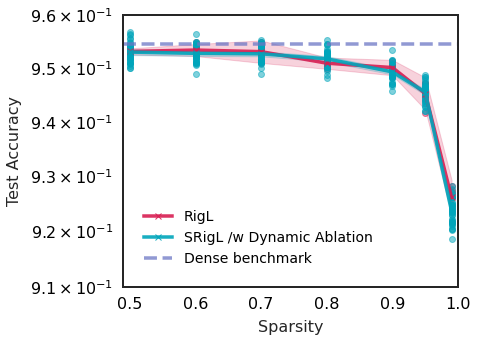

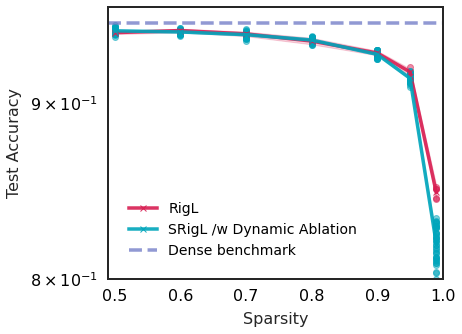

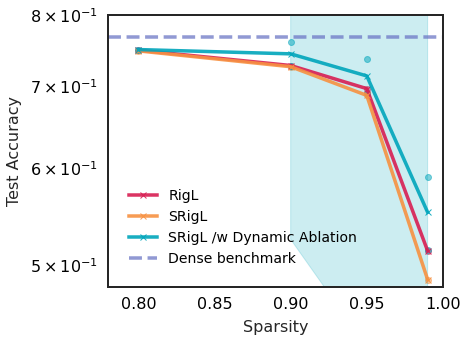

In [204]:
def get_accuracy_vs_sparsity_plot(model_name, ids, dense_benchmark_value, plot_99_sparsity=True, ylim=[0.9,1.0], xlim=[0.49,1.0]):
    # _BENCHMARK_VALUE = 0.9506

    plot_df = df.loc[ids].copy().sort_values(by="rigl.dense_allocation")
    plot_df["rigl.dynamic_ablation"].fillna(False, inplace=True)
    plot_df = plot_df.loc[plot_df["state"] == "finished"]
    if not plot_99_sparsity:
      plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
    plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
    plot_dfs = []
    fig, ax = plt.subplots(figsize=(6,5))


    for idx, (fan_in, dynamic_ablation) in enumerate(plot_df.groupby(["rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()):   
        df_slice = plot_df.loc[(plot_df["rigl.const_fan_in"] == fan_in) & (plot_df["rigl.dynamic_ablation"] == dynamic_ablation)]
        name, color = series_name_plot_mapper(fan_in, dynamic_ablation)
        agg_results = get_confidence_bounds_df(df_slice)
        # display(agg_results)
        ax.plot(
            agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=color, alpha=0.9
        )
        ax.fill_between(
            agg_results["sparsity"],
            agg_results["upper_bound"],
            agg_results["lower_bound"],
            color=color,
            alpha=0.20
        )
        ax.scatter(
            df_slice["sparsity"], df_slice["accuracy"], marker='o', color=color, alpha=0.5
        )

    ax.plot(xlim, [dense_benchmark_value, dense_benchmark_value], "--",  label="Dense benchmark", color=_COLORS[3], alpha=0.75)
    model_name_dict = dict(
        resnet18="ResNet18",
        wide_resnet22="WideResNet22"
    )
    #plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Validation Set Accuracy vs. Sparsity")
    plt.xlabel('Sparsity')
    plt.ylabel('Test Accuracy')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    tick_spaces=5
    y_tick_eps = (max(ylim) - min(ylim))/tick_spaces
    y_ticks = [min(ylim)+y_tick_eps*x for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    ax.set_yscale("log")
    fig_name = f"{model_name}_cifar_results"
    fig.savefig(f"{model_name}.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}.svg",format="svg", bbox_inches="tight")
    return fig

resnet18_params=dict(
    ids = resnet_ids,
    model_name ="../fig/resnet18",
    dense_benchmark_value = _RESNET18_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[0.91,0.96]
)

wide_resnet22_params=dict(
    ids = wide_res_ids,
    model_name ="../fig/wide_resnet22",
    dense_benchmark_value = _WIDE_RESNET_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[0.8,0.96]
)

imagenet_params=dict(
    ids = imagenet.index.to_list(),
    model_name ="../fig/resnet50",
    dense_benchmark_value = _IMAGENET_BENCHMARK,
    plot_99_sparsity=True,
    ylim=[0.48,0.8],
    xlim=[0.78,1.0],
)



fig = get_accuracy_vs_sparsity_plot(**resnet18_params)
fig = get_accuracy_vs_sparsity_plot(**wide_resnet22_params)
fig = get_accuracy_vs_sparsity_plot(**imagenet_params)
fig.show()


In [88]:
df.groupby(["rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()

MultiIndex([(False, False),
            (False,  True),
            ( True, False),
            ( True,  True),
            (  nan, False)],
           names=['rigl.const_fan_in', 'rigl.dynamic_ablation'])

In [92]:
df.loc[(df["rigl.const_fan_in"]== False) & (df["rigl.dynamic_ablation"]==True)][["best_accuracy", "model"]]

,best_accuracy,model
id,,
4dd9ect5,0.74984,resnet50
ugjdyrcn,0.72814,resnet50
agisu3gp,0.69662,resnet50
jfxtooy0,0.51468,resnet50


In [98]:
plot_df = imagenet
for idx, (fan_in, dynamic_ablation) in enumerate(plot_df.groupby(["rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()):   
        df_slice = plot_df.loc[(plot_df["rigl.const_fan_in"] == fan_in) & (plot_df["rigl.dynamic_ablation"] == dynamic_ablation)]
        print(fan_in, dynamic_ablation)
        display(df_slice["rigl.dense_allocation"])

False True


id
4dd9ect5    0.20
ugjdyrcn    0.10
agisu3gp    0.05
jfxtooy0    0.01
Name: rigl.dense_allocation, dtype: float64

True False


id
frwudbaa    0.20
ekipax62    0.10
u8w8bk6n    0.05
k49dzvg3    0.01
Name: rigl.dense_allocation, dtype: float64

True True


id
tbd2s4n5    0.20
pwj6hktu    0.10
51tgdkfn    0.05
oqqccm3r    0.01
Name: rigl.dense_allocation, dtype: float64

/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,sparsity,mean,lower_bound,upper_bound
0,0.99,60.874456,NaN,NaN
1,0.95,91.835994,NaN,NaN
2,0.90,97.772134,NaN,NaN
3,0.80,99.132801,NaN,NaN


/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,sparsity,mean,lower_bound,upper_bound
0,0.99,100.0,NaN,NaN
1,0.95,100.0,NaN,NaN
2,0.90,100.0,NaN,NaN
3,0.80,100.0,NaN,NaN


/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mike/condensed-sparsity/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,sparsity,mean,lower_bound,upper_bound
0,0.99,58.835269,NaN,NaN
1,0.95,94.706096,NaN,NaN
2,0.90,98.642961,NaN,NaN
3,0.80,99.437591,NaN,NaN


,sparsity,mean,lower_bound,upper_bound


,sparsity,mean,lower_bound,upper_bound


,sparsity,mean,lower_bound,upper_bound


,sparsity,mean,lower_bound,upper_bound


,sparsity,mean,lower_bound,upper_bound


,sparsity,mean,lower_bound,upper_bound


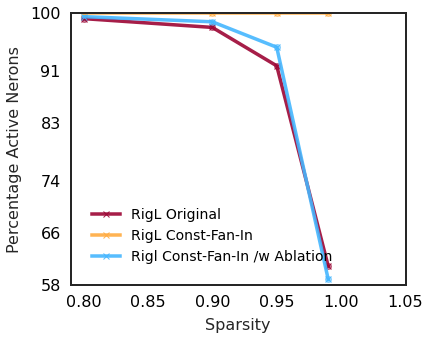

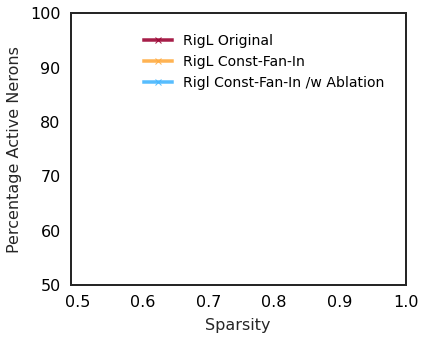

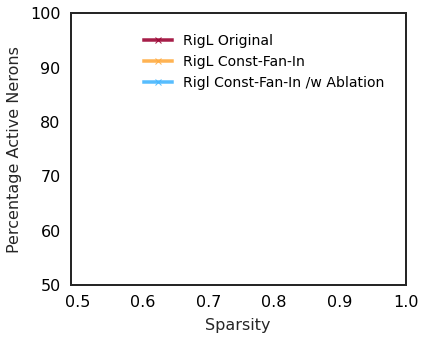

In [100]:
def plot_active_neurons_vs_sparsity(df, model_name="", ylim=[0.9,1.0], xlim=[0.49,1.0]):
    _TARGET_COL="_TOTAL_PERCENTAGE_ACTIVE_NEURONS"
    df=df.copy(deep=True)
    df = df.sort_values(by="rigl.dense_allocation")
    df["sparsity"] = 1-df["rigl.dense_allocation"]
    plot_dfs = []
    fig, ax = plt.subplots(figsize=(6,5))
    colors = ['#45b6fe','#ffab40','#9c0534'] # '#ffab40' '#ff671f'


    for idx, (fan_in, dynamic_ablation) in enumerate(df.groupby(["rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=False).count().index.unique()):   
        df_slice = df.loc[(plot_df["rigl.const_fan_in"] == fan_in) & (df["rigl.dynamic_ablation"] == dynamic_ablation)]
        if fan_in:
            if dynamic_ablation:
                name = "Rigl Const-Fan-In /w Ablation"
                color=colors[0]
            else:
                name = "RigL Const-Fan-In"
                color=colors[1]
        else:
            name = "RigL Original"
            color=colors[2]
        agg_results = get_confidence_bounds_df(df_slice, target_col=_TARGET_COL)
        display(agg_results)
        ax.plot(
            agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=color, alpha=0.9
        )
        ax.fill_between(
            agg_results["sparsity"],
            agg_results["upper_bound"],
            agg_results["lower_bound"],
            color=color,
            alpha=0.20
        )
        ax.scatter(
            df_slice["sparsity"], df_slice[_TARGET_COL], marker='o', color=color, alpha=0.5
        )

    plt.xlabel('Sparsity')
    plt.ylabel('Percentage Active Nerons')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    tick_spaces=5
    y_tick_eps = (max(ylim) - min(ylim))/tick_spaces
    y_ticks = [int(min(ylim)+y_tick_eps*x) for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    fig.savefig(f"{model_name}_perc_active.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}_perc_active.svg",format="svg", bbox_inches="tight")
    return fig

# sweep_id_ablation_exp = "a2uywunn"
# df.loc[df["sweep_id"]==sweep_id_ablation_exp]["rigl.dense_allocation"].unique()

# resnet18_const_fan_false_ids=df.loc[(df["sweep_id"]==sweep_id_ablation_exp) & (df["model"]=="resnet18")].index.to_list()
# wide_resnet22_const_fan_false_ids=df.loc[(df["sweep_id"]==sweep_id_ablation_exp) & (df["model"]=="wide_resnet22")].index.to_list()
# imagenet_ids = imagenet.loc[imagenet["rigl.dynamic_ablation"] == True].index
# fig = plot_active_neurons_vs_sparsity(imagenet.loc[imagenet_ids], "imagenet", ylim=[58, 100], xlim=[0.79, 1.0])
# fig = plot_active_neurons_vs_sparsity(df.loc[new_high_sparse_ids+resnet18_const_fan_false_ids], "resnet18", ylim=[50, 100])
# fig = plot_active_neurons_vs_sparsity(df.loc[wide_const_fan_ids+wide_resnet22_const_fan_false_ids], "wide_resnet22", ylim=[50, 100])
fig = plot_active_neurons_vs_sparsity(imagenet, "imagenet", ylim=[58, 100], xlim=[0.79, 1.05])
fig = plot_active_neurons_vs_sparsity(df.loc[resnet_ids], "resnet18", ylim=[50, 100])
fig = plot_active_neurons_vs_sparsity(df.loc[wide_res_ids], "wide_resnet22", ylim=[50, 100])

# Min Salient

In [134]:

min_salient_sweep_id = "hgqc3joo"
min_sal_df = df.loc[df["sweep_id"]==min_salient_sweep_id]
# min_sal_df.groupby(["model", "rigl.dense_allocation", "rigl.min_salient_weights_per_neuron"]).count()
min_sal_df.groupby(["rigl.dense_allocation", "rigl.min_salient_weights_per_neuron"]).mean()["accuracy"].sort_values(ascending=False)

rigl.dense_allocation  rigl.min_salient_weights_per_neuron
0.10                   0.100                                  0.94047
                       0.010                                  0.93973
                       0.050                                  0.93964
                       0.005                                  0.93937
                       0.001                                  0.93917
                       0.000                                  0.93838
                       1.000                                  0.93836
0.05                   0.100                                  0.93126
                       0.005                                  0.93071
                       1.000                                  0.93043
                       0.001                                  0.93029
                       0.050                                  0.93014
                       0.010                                  0.92983
                       0.000   

/tmp/ipykernel_611/691684184.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_sal_df["model"] = min_sal_df["model"].fillna(min_sal_df["model.name"])


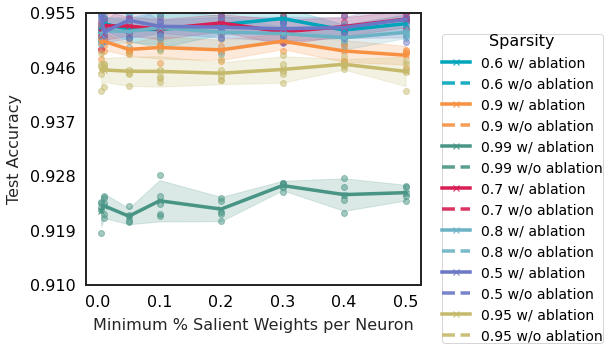

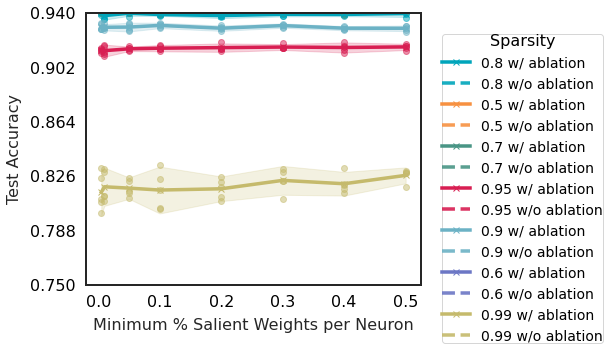

In [17]:
## Hyperparam search for min salient

def plot_min_salient_sweep(df, model_name="", ylim=[0.9,1.0], xlim=[0.49,1.0]):
    _TARGET_COL="accuracy"
    x_col = "rigl.min_salient_weights_per_neuron"
    df=df.copy(deep=True)
    df = df.sort_values(by=x_col)
    df["sparsity"] = 1-df["rigl.dense_allocation"]
    plot_dfs = []
    fig, ax = plt.subplots(figsize=(6,5))
    # colors = ['#45b6fe','#ffab40','#9c0534', '#ffab40', '#ff671f']
    colors = ['#00a5bb','#f79141','#499585', '#d81e52', '#6cb2c5' , '#6c77c5', '#c5ba6c', '#56ce93', '#d88fBf', '#ffd505']


    for idx, sparsity in enumerate(df["sparsity"].unique()):
        name=f"{sparsity} w/ ablation"
        df_slice = df.loc[df["sparsity"] == sparsity]
        agg_results = get_confidence_bounds_df(df_slice, target_col=_TARGET_COL, x_col=x_col)
        ax.plot(
            agg_results[x_col], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
        )
        ax.fill_between(
            agg_results[x_col],
            agg_results["upper_bound"],
            agg_results["lower_bound"],
            color=colors[idx],
            alpha=0.20
        )
        ax.scatter(
            df_slice[x_col], df_slice[_TARGET_COL], marker='o', color=colors[idx], alpha=0.5
        )
        benchmark_val = df_slice.loc[df_slice[x_col]==0]["accuracy"].mean()
        ax.plot(xlim, [benchmark_val, benchmark_val], "--",  label=f"{sparsity} w/o ablation", color=colors[idx], alpha=0.9)

    plt.xlabel('Minimum % Salient Weights per Neuron')
    plt.ylabel('Test Accuracy')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.legend(bbox_to_anchor=(1,1))
    ax.get_legend().set_title("Sparsity")
    ax.set_ylim(ylim)
    # ax.set_xlim(xlim)
    # ax.set_xscale("log")
    tick_spaces=5
    y_tick_eps = (max(ylim) - min(ylim))/tick_spaces
    y_ticks = [min(ylim)+y_tick_eps*x for x in range(tick_spaces+1)]
    ax.set_yticks(y_ticks)
    fig.savefig(f"{model_name}_salient_sweep.png", dpi=600, bbox_inches="tight")
    fig.savefig(f"{model_name}_salient_sweep.svg",format="svg", bbox_inches="tight")
    return fig


# min_salient_sweep_id = "hgqc3joo"
# min_sal_df = df.loc[df["sweep_id"]==min_salient_sweep_id]
min_sal_df = df.loc[df["tags"].str.contains("sweep_1fik36lx")]
min_sal_df = df.loc[df["tags"].str.contains("sweep_1fik36lx")]
min_sal_df["model"] = min_sal_df["model"].fillna(min_sal_df["model.name"])
# min_sal_df["rigl.min_salient_weights_per_neuron"]
# for model_name in ['resnet18', 'wide_resnet22']:
fig = plot_min_salient_sweep(min_sal_df.loc[min_sal_df["model"]=="resnet18"], model_name="resnet18", ylim=[0.91,0.955], xlim=[0,1])
fig.show()
fig = plot_min_salient_sweep(min_sal_df.loc[min_sal_df["model"]=="wide_resnet22"], model_name="wide_resnet22", ylim=[0.75,0.94], xlim=[0,1])
fig.show()

In [29]:
min_sal_df = df.loc[df["tags"].str.contains("sweep_1fik36lx")]
min_sal_df["model"] = min_sal_df["model"].fillna(min_sal_df["model.name"])
# min_sal_df = min_sal_df.loc[min_sal_df["rigl.dense_allocation"]==0.05]
for model_name in ["resnet18", "wide_resnet22"]:
    display(min_sal_df.loc[min_sal_df["model"]==model_name][["rigl.min_salient_weights_per_neuron", "training.seed", "best_accuracy"]].groupby("training.seed").agg(["mean", 'std'])["best_accuracy"].sort_values(by="mean"))

/tmp/ipykernel_611/898048776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_sal_df["model"] = min_sal_df["model"].fillna(min_sal_df["model.name"])


,mean,std
training.seed,,
7303.0,0.947914,0.009410
42.0,0.948166,0.010062
2078.0,0.948202,0.009615
6037.0,0.948202,0.009620
8746.0,0.948339,0.009485


,mean,std
training.seed,,
42.0,0.920880,0.042364
6037.0,0.920995,0.042294
2078.0,0.921062,0.042162
8746.0,0.921089,0.041851
7303.0,0.921484,0.040645


In [98]:
    interested_cols=[
        "rigl.const_fan_in",
        "rigl.dynamic_ablation",
        "rigl.dense_allocation",
        "accuracy",
        "best_accuracy",
        "sparsity"
    ]
df.loc[resnet_ids].loc[~df["rigl.dynamic_ablation"].isna()][interested_cols]

,rigl.const_fan_in,rigl.dynamic_ablation,rigl.dense_allocation,accuracy,best_accuracy,sparsity
id,,,,,,
q1c5ldrm,False,False,0.01,0.9282,0.9303,0.99
gp8uog4a,False,False,0.01,0.9275,0.9298,0.99
8euvnykc,False,False,0.01,0.9217,0.9266,0.99
47keahsb,False,False,0.01,0.9261,0.9287,0.99
jn8w8nmg,False,False,0.01,0.9272,0.9288,0.99
...,...,...,...,...,...,...
cw73smba,True,True,0.01,0.9214,0.9229,0.99
723zm8do,True,True,0.01,0.9244,0.9271,0.99
ouznj6tv,True,True,0.01,0.9232,0.9255,0.99


In [100]:
df_test = df[interested_cols].groupby(["rigl.dense_allocation", "rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=True).agg(["mean", "std"])

In [108]:
# df_test[("sparsity", "mean")]
df_test.columns

MultiIndex([(     'accuracy', 'mean'),
            (     'accuracy',  'std'),
            ('best_accuracy', 'mean'),
            ('best_accuracy',  'std'),
            (     'sparsity', 'mean'),
            (     'sparsity',  'std')],
           )

In [150]:
def get_results_table(df, ids, benchmark_value, caption, label) -> str:
    df = get_df_for_table(df, ids)
    df=df.copy(deep=True)
    table_str=""
    table_header=(
        "\\begin{table}[h!]\n"
        "\\begin{center}\n"
        "\\begin{tabular}{ c | c | c } \n"
        "\\multirow{2}{*}{\\textbf{Sparsity (\%)}} & \\multicolumn{2}{c}{\\textbf{Test Accuracy (\%)}}\\\\ "
        "& original RigL & constant fan-in RigL \\\\"
        "\n\\hline\n"
    )
    benchmark_row= f"0  & ${benchmark_value*100:.2f}$ & -- \\\\"
    table_str+=table_header+benchmark_row
    df = df.groupby(["rigl.dense_allocation", "rigl.const_fan_in", "rigl.dynamic_ablation"], dropna=True).agg(["mean", "std"])
    df = df.sort_values(by=("sparsity", "mean"), ascending=True)


    for s in df["sparsity"]["mean"].unique():
        df_slice=df.loc[df["sparsity"]['mean']==s]
        row = get_table_row(df_slice, s)
        table_str+="\n"
        table_str+=row
    
    table_footer = (
        "\\hline\n"
        "\\end{tabular}\n"
        f"\\caption{{{caption}}}\\label{{table:{label}}}\n"
        "\\end{center}\n"
        "\\end{table}\n"

    )
    table_str+=table_footer
    return table_str

def get_df_for_table(df, ids, fill_best_nan:bool=True,):
    interested_cols=[
        "rigl.const_fan_in",
        "rigl.dynamic_ablation",
        "rigl.dense_allocation",
        "accuracy",
        "best_accuracy",
        "sparsity"
    ]
    df["sparsity"] = 1-df["rigl.dense_allocation"]
    df_slice = df.loc[ids][interested_cols]
    df = df_slice.copy(deep=True)
    if fill_best_nan:
        df["best_accuracy"].loc[df["best_accuracy"].isna()] = df["accuracy"].loc[df["best_accuracy"].isna()]
        # df["rigl.dynamic_ablation"].fillna(False, inplace=True)
    df["+/-"] = df["best_accuracy"] - df["accuracy"]
    return df
    

def get_table_row(df_slice, s):
    # Index is dense_alloc, const_fan, dynamic_ablation
    const_fan_slice = df_slice.loc[:, True, True]
    const_mean=const_fan_slice["best_accuracy"]["mean"].item()
    const_std=const_fan_slice["best_accuracy"]["std"].item()
    const_fan_text = f"{const_mean*100:.2f}"
    if not np.isnan(const_std):
        const_fan_text += f"\\pm {const_std*100:.2f}"
    else:
        const_std=0
    vanilla_slice = df_slice.loc[:, False, :]
    vanilla_mean=vanilla_slice["best_accuracy"]["mean"].item()
    vanilla_std=vanilla_slice["best_accuracy"]["std"].item()
    vanilla_text = f"{vanilla_mean*100:.2f}"
    if not np.isnan(vanilla_std):
        vanilla_text += f"\\pm {vanilla_std*100:.2f}"
    else:
        vanilla_std=0

    
    if const_mean - const_std >= vanilla_mean+vanilla_std:
        const_fan_text = f"\\mathbf{{{const_fan_text}}}"
    elif const_mean + const_std <= vanilla_mean-vanilla_std:
        vanilla_text = f"\\mathbf{{{vanilla_text}}}"
    row_text = f"{s*100:.0f} & ${vanilla_text}$ & ${const_fan_text}$ \\\\"
    return row_text

resnet18_table_args = dict(
    df=df,
    ids=resnet_ids,
    benchmark_value=_RESNET18_BENCHMARK,
    caption= "Test accuracy of ResNet-18 trained with RigL on CIFAR-10. Standard deviations are reported over five runs",
    label="resnet18_cifar10_table"
    
)

wide_resnet_table_args = dict(
    df=df,
    ids=wide_res_ids,
    benchmark_value=_WIDE_RESNET_BENCHMARK,
    caption= "Test accuracy of Wide ResNet-22 trained with RigL on CIFAR-10. Standard deviations are reported over five runs",
    label="wide_resnet22_table"
    
)

imagenet_ids = imagenet.loc[imagenet["rigl.dynamic_ablation"] == True].index
imagenet_table_args = dict(
    df=df,
    ids=imagenet_ids,
    benchmark_value=_IMAGENET_BENCHMARK,
    caption= "Test accuracy of ResNet-50 trained with RigL on ImageNet.",
    label="resnet50_imagenet_table"
    
)
for kwargs in [resnet18_table_args, wide_resnet_table_args, imagenet_table_args]:
    print(get_results_table(**kwargs))


#         50 & 95.40 $\pm 0.06$ & $95.45 \pm 0.13$ \\
#         60 & 95.45 $\pm 0.08$ & $95.39 \pm 0.10$ \\
#         70 & $95.41 \pm 0.10$ & 95.38 $\pm 0.12$ \\
#         80 & $95.20 \pm 0.08$ & 95.25 $\pm 0.17$ \\
#         90 & $95.06 \pm 0.14$ & 95.11 $\pm 0.19$ \\
#         95 & $94.62 \pm 0.20$ & 94.74 $\pm 0.15$ \\
#         99 & $\mathbf{92.88 \pm 0.14}$ & 92.43 $\pm 0.28$ \\
#          \hline
#         \end{tabular}
#     \caption{Test accuracy of ResNet-18 trained with RigL on CIFAR-10. Standard deviations are reported over five runs.}\label{table:riglexperiments}
#     \end{center}
# \end{table}

\begin{table}[h!]
\begin{center}
\begin{tabular}{ c | c | c } 
\multirow{2}{*}{\textbf{Sparsity (\%)}} & \multicolumn{2}{c}{\textbf{Test Accuracy (\%)}}\\ & original RigL & constant fan-in RigL \\
\hline
0  & $95.45$ & -- \\
50 & $95.40\pm 0.06$ & $95.45\pm 0.13$ \\
60 & $95.45\pm 0.08$ & $95.39\pm 0.10$ \\
70 & $95.41\pm 0.10$ & $95.38\pm 0.12$ \\
80 & $95.20\pm 0.08$ & $95.25\pm 0.17$ \\
90 & $95.06\pm 0.14$ & $95.11\pm 0.19$ \\
95 & $94.62\pm 0.20$ & $94.74\pm 0.15$ \\
99 & $\mathbf{92.88\pm 0.14}$ & $92.43\pm 0.28$ \\\hline
\end{tabular}
\caption{Test accuracy of ResNet-18 trained with RigL on CIFAR-10. Standard deviations are reported over five runs}\label{table:resnet18_cifar10_table}
\end{center}
\end{table}

\begin{table}[h!]
\begin{center}
\begin{tabular}{ c | c | c } 
\multirow{2}{*}{\textbf{Sparsity (\%)}} & \multicolumn{2}{c}{\textbf{Test Accuracy (\%)}}\\ & original RigL & constant fan-in RigL \\
\hline
0  & $95.00$ & -- \\
50 & $94.61\pm 0.05$ & $94.63\pm 0.13$ \\
60 & $9

/tmp/ipykernel_1415170/2589283243.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_accuracy"].loc[df["best_accuracy"].isna()] = df["accuracy"].loc[df["best_accuracy"].isna()]
/tmp/ipykernel_1415170/2589283243.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["best_accuracy"].loc[df["best_accuracy"].isna()] = df["accuracy"].loc[df["best_accuracy"].isna()]
/tmp/ipykernel_1415170/2589283243.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [115]:
# Tables


    
    
# updated_df = print_table(df, resnet_ids, fill_best_nan=True)
    
    